# API Reference

Import everything from the imports notebook. This reads in all of the expression data as well as the functions needed to analyse differential expression data.

In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

__matched_tn__ is our matched expression data.

In [2]:
matched_tn.T.head(10).T.head()

TCGA-22-4593        TCGA-22-4609        TCGA-22-5471        TCGA-22-5472        TCGA-22-5478      
                 01    11            01    11            01    11            01    11            01    11
?              0.97  0.48          1.52  1.31          1.13  0.60          1.14  1.29          1.41  0.80
A1BG           6.56  5.63          5.79  6.10          6.25  5.40          4.79  4.98          7.69  5.12
A1CF          -3.00 -3.00         -3.00 -3.00         -3.00 -3.00         -3.00 -3.00         -3.00 -3.00
A2BP1          1.79  0.05         -1.56 -3.00         -3.00 -3.00         -3.00 -1.96         -0.34 -3.00
A2LD1          5.28  6.72          6.29  6.06          7.53  5.79          5.85  5.97          5.53  5.88

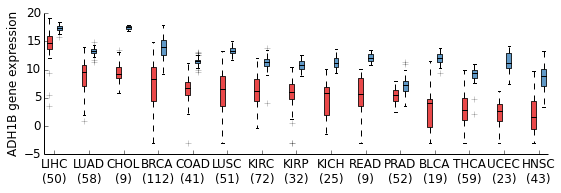

In [3]:
paired_bp_tn_split(matched_tn.ix['ADH1B'], codes)

###Run a simple screen for DX genes 
* Here we take the matched expression data and fun a basic screen
* fc = 1 means that we have no foldchange buffer for a gene to be considered over or underexpressed in a patient

In [4]:
tab = binomial_test_screen(matched_tn, fc=1.)

A peek at the most frequently differentially expressed genes.

In [5]:
tab.sort('p').head(10)

,num_ox,num_dx,frac,p
ADH1B,29,669,0.04,4.52e-151
IQGAP3,636,669,0.95,7.71e-146
FOXM1,635,669,0.95,1.44e-144
KIF4A,635,669,0.95,1.44e-144
GSTM5,36,669,0.05,4.63e-142
PKMYT1,633,669,0.95,4.63e-142
TROAP,631,669,0.94,1.32e-139
UBE2C,631,669,0.94,1.32e-139
ADH1A,38,665,0.06,1.67e-138
TPX2,628,669,0.94,5.20e-136


Distribution of genes' likelyhood to be overexpressed.

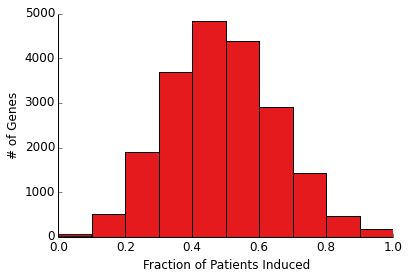

In [6]:
fig, ax = subplots(figsize=(6,4))
tab.frac.hist(ax=ax)
ax.set_xlabel('Fraction of Patients Induced')
ax.set_ylabel('# of Genes')
prettify_ax(ax)

### Infer missing values for normal tissue expression

In [7]:
cancers = codes.ix[matched_tn.columns.get_level_values(0)].unique()

In [8]:
cancer = 'HNSC'
df = matched_tn.ix[:, ti(codes==cancer)]
tab1 = binomial_test_screen(df, fc=1.)

Infer data and remove patients for which data was not inferred.

In [9]:
df_inf = infer_normal_knn(rna_df.ix[:, ti(codes == 'HNSC')], r_curtoff=.3, k=5)
df_inf = df_inf.ix[:, df_inf.columns.diff(df.columns)]

Repeat the DX screen with the inferred data.

In [10]:
tab = binomial_test_screen(df_inf, fc=1.)
pearson_pandas(tab.frac, tab1.frac)

rho    0.87
p      0.00
dtype: float64

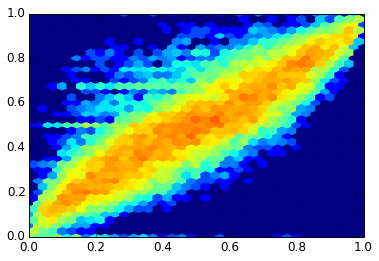

In [11]:
plt.hexbin(*match_series(tab.frac, tab1.frac), bins='log', gridsize=35);